# Microsoft Data Analysis


* Student name: Joe Garcia
* Student pace: full time
* Scheduled project review date/time: 3/11/2022, 11am
* Instructor name: Praveen Gowtham
* Blog post URL:

# OVERVIEW

Presenting to business partner, Microsoft, what would be the best practices to making a movie. They will lean how much budget to put in a movie, what kind of movie they should focus on, and what the general perception of a movie is taken by the audience.

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

- How does the overall budget impacts the final movie result?
- How does the general public receive the movies?
- What are the major traits per movie that they should follow?

In [178]:
import padas as pd
import math
import matplotlib
import matplotlib.pyplot as plt 
from re import sub
from decimal import Decimal
import numpy as np
import seaborn as sns, operator as op
%matplotlib inline


#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics_df = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False)
movie_basics_df.head()

ModuleNotFoundError: No module named 'padas'

In [80]:
movie_basics_df['start_year'].sort_values()

9599     2010
43264    2010
11550    2010
11551    2010
11552    2010
         ... 
2948     2024
52213    2025
2949     2026
96592    2027
89506    2115
Name: start_year, Length: 146144, dtype: int64

In [175]:
movie_basics_df= movie_basics_df[(movie_basics_df['start_year'] >= 2010) & (movie_basics_df['start_year'] <= 2022)]
movie_basics_df.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [82]:
genres_list = list(movie_basics_df['genres'].dropna())
genres_list

['Action,Crime,Drama',
 'Biography,Drama',
 'Drama',
 'Comedy,Drama',
 'Comedy,Drama,Fantasy',
 'Comedy',
 'Horror,Thriller',
 'Adventure,Animation,Comedy',
 'Documentary,History',
 'Biography',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Animation,Drama,History',
 'Drama',
 'Drama',
 'Drama,Mystery',
 'Action,Animation,Comedy',
 'Crime,Drama',
 'Biography,Comedy,Drama',
 'Documentary',
 'Documentary',
 'Drama',
 'Action,Drama',
 'Documentary,History',
 'Sci-Fi',
 'Comedy',
 'Documentary',
 'Thriller',
 'Action,Adventure,Fantasy',
 'Crime,Drama',
 'Drama,Romance',
 'Adventure,Animation,Sci-Fi',
 'Action,Crime,Drama',
 'Drama,Horror',
 'Drama,Mystery,Thriller',
 'Drama,Family',
 'Adventure,Comedy,Romance',
 'Comedy,Drama',
 'Adventure,Animation,Comedy',
 'Adventure,Drama,Romance',
 'Comedy,Crime,Drama',
 'Biography',
 'Horror',
 'Comedy,Drama',
 'Drama',
 'Adventure,Comedy,Drama',
 'Drama,Sci-Fi,Thriller',
 'Action',
 'Comedy,Drama,Romance',
 'Action,Crime,Drama',


In [83]:
unique_genre_names = []

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 :
        unique_genre_names.append(i)
    else:
        None
unique_genre_names  

['Drama',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Drama',
 'Drama',
 'Documentary',
 'Documentary',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Documentary',
 'Thriller',
 'Biography',
 'Horror',
 'Drama',
 'Action',
 'Documentary',
 'Drama',
 'Drama',
 'Adventure',
 'Drama',
 'Drama',
 'Fantasy',
 'Documentary',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Comedy',
 'Drama',
 'Documentary',
 'Action',
 'Documentary',
 'Documentary',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Horror',
 'Drama',
 'Musical',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Comedy',
 'Drama',
 'Comedy',
 'Documentary',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Thriller',
 'Thriller',
 'Comedy',
 'Drama',
 'Documentary',
 'Documentary',
 'Action',
 'Documentary',
 'Comedy',
 

In [84]:
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : 0})   
unique_genre_names_dic

{'Drama': 0,
 'Comedy': 0,
 'Biography': 0,
 'History': 0,
 'Documentary': 0,
 'Sci-Fi': 0,
 'Thriller': 0,
 'Horror': 0,
 'Action': 0,
 'Adventure': 0,
 'Fantasy': 0,
 'Musical': 0,
 'Western': 0,
 'Romance': 0,
 'Mystery': 0,
 'Crime': 0,
 'Animation': 0,
 'Family': 0,
 'Sport': 0,
 'Music': 0,
 'News': 0,
 'Talk-Show': 0,
 'Reality-TV': 0,
 'War': 0,
 'Game-Show': 0}

In [85]:
for string_name in genres_list:
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    for word in string_list: # think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:  #if word is in the unique names dictionary, add 1 to the dictionary
            unique_genre_names_dic[word] = unique_genre_names_dic[word]+1

In [86]:
#Here I sorted the dictionary of genres by the number of movies (values)
sorted_genre_dict = dict(sorted(unique_genre_names_dic.items(),key=lambda x:x[1],reverse = True))
sorted_genre_dict

{'Documentary': 51640,
 'Drama': 49880,
 'Comedy': 25312,
 'Thriller': 11883,
 'Horror': 10805,
 'Action': 10331,
 'Romance': 9372,
 'Biography': 8722,
 'Crime': 6753,
 'Adventure': 6460,
 'Family': 6226,
 'History': 6225,
 'Mystery': 4659,
 'Music': 4314,
 'Fantasy': 3511,
 'Sci-Fi': 3365,
 'Animation': 2799,
 'Sport': 2234,
 'News': 1551,
 'Musical': 1430,
 'War': 1405,
 'Western': 467,
 'Reality-TV': 98,
 'Talk-Show': 50,
 'Game-Show': 4}

In [87]:
genre_values_sorted_list = list(sorted_genre_dict.values())
top_genre_values_sorted = genre_values_sorted_list[:15]

In [88]:
genre_names_sorted_list = list(sorted_genre_dict.keys())
top_genre_names_sorted = genre_names_sorted_list[:15]

Text(0, 0.5, 'Number of Movies')

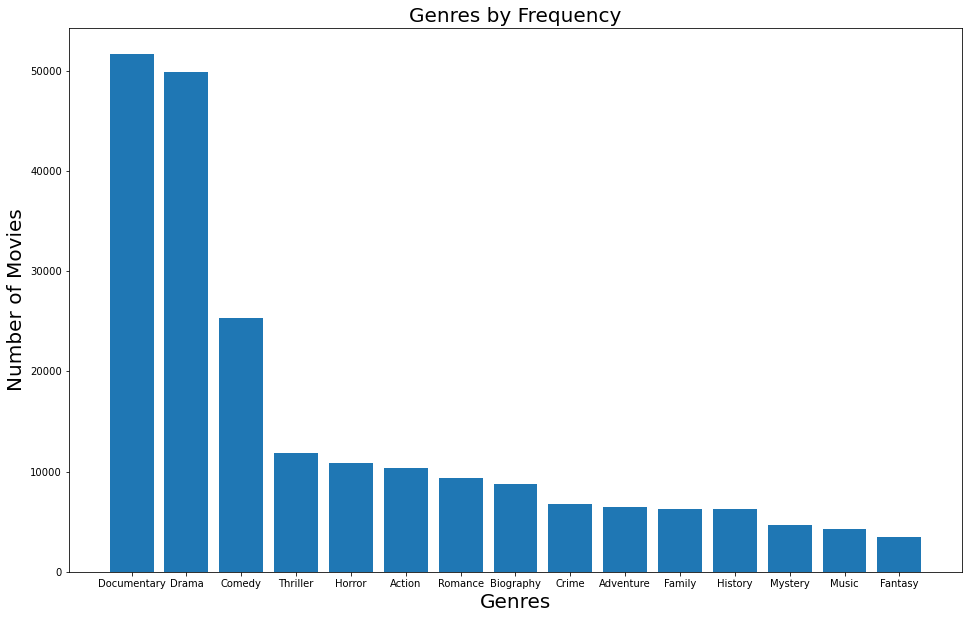

In [89]:
bar_chart_title = 'Genres by Frequency' 
bar_chart_count_label = 'Number of Movies'
bar_chart_series_label = 'Genres'


player_count_figure1, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(x = top_genre_names_sorted, height = top_genre_values_sorted ) 

ax1.set_title(bar_chart_title, fontsize = 20) 
ax1.set_xlabel(bar_chart_series_label, fontsize=20) 
ax1.set_ylabel(bar_chart_count_label, fontsize = 20)

In [174]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [91]:
# changes money string to a float 
def change_money_to_float(money_string):
    float_value= float(Decimal(sub(r'[^\d.]', '', money_string)) )
    return float_value

In [92]:
domestic_gross_list =list(movie_budgets_df['domestic_gross'][0:])

domestic_gross_df4 = [ change_money_to_float(t) for t in domestic_gross_list] 

# Dropping old domestic_gross column and putting the new one in that has floats

columns_to_overwrite1 = ['domestic_gross']

movie_budgets_df.drop(labels=columns_to_overwrite1, axis="columns", inplace=True)

movie_budgets_df['domestic_gross'] = domestic_gross_df4

In [93]:
worldwide_list =list(movie_budgets_df['worldwide_gross'][0:])

worldwide_gross_df4 = [ change_money_to_float(t) for t in worldwide_list]

# Doing the same to worldwide_gross

columns_to_overwrite2 = ['worldwide_gross']

movie_budgets_df.drop(labels=columns_to_overwrite2, axis="columns", inplace=True)

movie_budgets_df['worldwide_gross'] = worldwide_gross_df4

In [94]:
production_budget_list =list(movie_budgets_df['production_budget'][0:])

production_budget_df4 = [ change_money_to_float(t) for t in production_budget_list]

# Doing the same to production_budget

columns_to_overwrite3 = ['production_budget']

movie_budgets_df.drop(labels=columns_to_overwrite3, axis="columns", inplace=True)

movie_budgets_df['production_budget'] = production_budget_df4

In [95]:
worldwide_prod_list = list(movie_budgets_df['worldwide_gross']/movie_budgets_df['production_budget'])
len(worldwide_prod_list)

5782

In [96]:
worldwide_prod_rounded = [round(worldwide_prod_list[x] , 4) for x in list(range(0,len(worldwide_prod_list)))]

sorted(worldwide_prod_rounded, reverse = True)

[1800.0,
 498.75,
 431.5179,
 416.5647,
 413.8333,
 342.0586,
 312.3543,
 291.704,
 263.9216,
 225.0,
 215.3846,
 208.5301,
 189.8031,
 180.1802,
 164.5827,
 155.4909,
 144.2311,
 125.0,
 124.2779,
 122.5,
 120.2751,
 115.3464,
 115.3068,
 111.0373,
 108.6447,
 102.4316,
 101.7595,
 101.3333,
 100.1347,
 100.0,
 95.576,
 90.8936,
 89.7959,
 89.5863,
 86.5667,
 78.4,
 75.5205,
 74.978,
 74.6427,
 71.5089,
 70.1459,
 68.8017,
 67.378,
 66.9466,
 66.5806,
 64.585,
 64.3642,
 63.1191,
 61.2158,
 60.6204,
 59.7015,
 59.567,
 59.1707,
 57.5085,
 55.793,
 55.4583,
 53.9768,
 53.3699,
 53.3659,
 52.2862,
 51.0736,
 47.9026,
 47.2,
 46.707,
 45.9615,
 44.8957,
 43.497,
 42.4117,
 41.6333,
 41.408,
 40.7857,
 40.5985,
 40.0825,
 40.0,
 39.5174,
 39.45,
 39.225,
 39.1989,
 38.9811,
 38.3571,
 37.6,
 37.2959,
 36.8582,
 36.8243,
 36.6667,
 36.5439,
 36.1702,
 35.8763,
 35.6845,
 35.6322,
 34.9042,
 34.4835,
 34.0,
 33.3333,
 33.0929,
 33.0643,
 32.3843,
 31.779,
 31.0163,
 30.9033,
 30.8214,
 30.6

In [97]:
movie_budgets_df['ROI for WorldWide'] = worldwide_prod_rounded

In [173]:
#so trying to display worldwide_ROI 

movie_budgets_df.sort_values( by= "ROI for WorldWide", ascending = False).head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
5745,46,"Jun 30, 1972",Deep Throat,45000000.0,45000000.0,25000.0,1800.0000,1800.0000
5613,14,"Mar 21, 1980",Mad Max,8750000.0,99750000.0,200000.0,498.7500,43.7500
5492,93,"Sep 25, 2009",Paranormal Activity,107918810.0,194183034.0,450000.0,431.5179,239.8196
5679,80,"Jul 10, 2015",The Gallows,22764410.0,41656474.0,100000.0,416.5647,227.6441
5406,7,"Jul 14, 1999",The Blair Witch Project,140539099.0,248300000.0,600000.0,413.8333,234.2318


In [99]:
dom_prod_list = list(movie_budgets_df['domestic_gross']/movie_budgets_df['production_budget'])
len(dom_prod_list)

5782

In [100]:
dom_prod_list_rounded = [round(dom_prod_list[x] , 4) for x in list(range(0,len(dom_prod_list)))]

sorted_rounded_list = sorted(dom_prod_list_rounded[0:10], reverse = True)
sorted_rounded_list

[3.061, 2.2627, 1.9564, 1.7894, 1.3884, 1.0314, 0.7634, 0.6669, 0.5871, 0.1222]

In [101]:
movie_budgets_df['ROI for Domestic'] = dom_prod_list_rounded

In [172]:
# look at df4 again
movie_budgets_df.head()


,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
0,1,"Dec 18, 2009",Avatar,760507625.0,2.776345e+09,425000000.0,6.5326,1.7894
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
3,4,"May 1, 2015",Avengers: Age of Ultron,459005868.0,1.403014e+09,330600000.0,4.2438,1.3884
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,620181382.0,1.316722e+09,317000000.0,4.1537,1.9564


In [103]:
# filtering out the ones where ROI for domestic column is 0
movie_budgets_df = movie_budgets_df[movie_budgets_df['ROI for Domestic'] != 0.0]

In [171]:
# look at df4 now

#df4.sort_values(by='ROI for Domestic').head(50)
movie_budgets_df.sort_values(by='ROI for Domestic').head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
2003,4,"Feb 21, 2008",Genghis Khan: To the Ends of the Earth and Sea,3892.0,4874498.0,30000000.0,0.1625,0.0001
2004,5,"Jan 30, 2015",Wild Card,3200.0,4315789.0,30000000.0,0.1439,0.0001
4081,82,"May 21, 2010",Perrierâs Bounty,828.0,828.0,6600000.0,0.0001,0.0001
3818,19,"May 8, 2015",Skin Trade,1242.0,1242.0,9000000.0,0.0001,0.0001
1767,68,"Sep 5, 2014",Thunder and the House of Magic,4091.0,62582520.0,34000000.0,1.8407,0.0001


In [105]:
# filter out the movies where the ROI for domestic is too little (0.1) or too large (>1000)

df4_ROIcropped = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] >=0.1) & (movie_budgets_df['ROI for Domestic'] < 50.0)]

In [179]:

#player_count_figure2, ax = plt.subplots(figsize=(16, 13))

#plt.scatter(df4_ROIcropped['production_budget'],df4_ROIcropped['ROI for Domestic'])
#plt.xlabel('Production Budget')
#plt.ylabel('ROI')
#plt.title('ROI from Domestic Revenue' )
#plt.show()

In [107]:
df4_productioncropped = df4_ROIcropped [ df4_ROIcropped ['production_budget'] < 2e8]

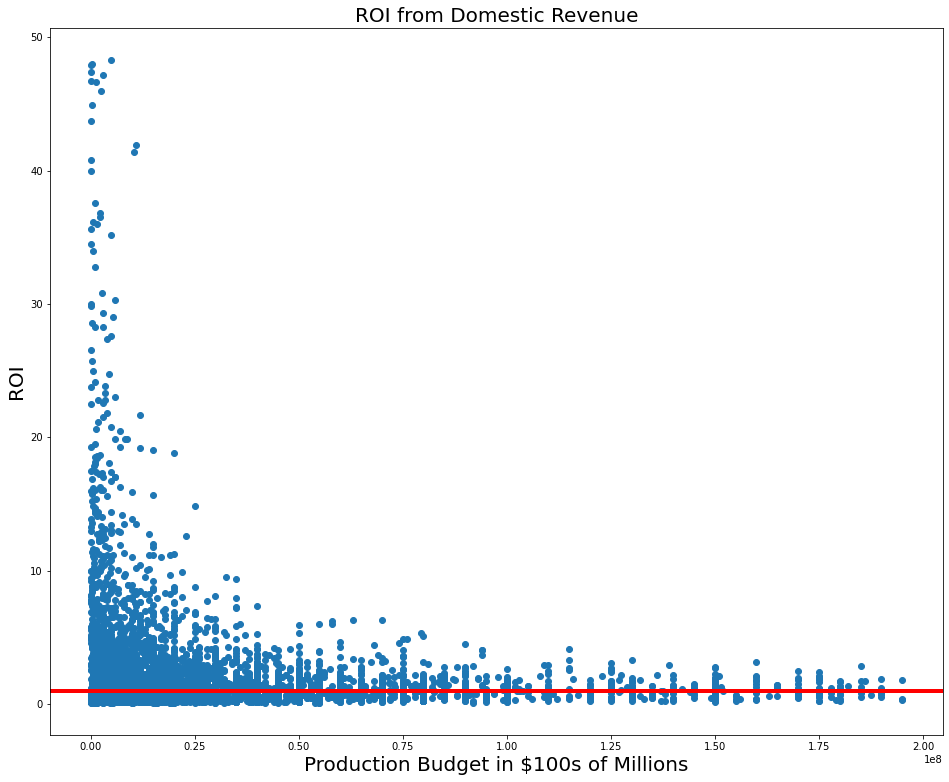

In [108]:
player_count_figure3, ax = plt.subplots(figsize=(16, 13))

plt.scatter(df4_productioncropped['production_budget'], df4_productioncropped['ROI for Domestic'])
plt.xlabel('Production Budget in $100s of Millions',fontsize = 20)
plt.ylabel('ROI', fontsize = 20)
plt.title('ROI from Domestic Revenue',fontsize = 20 )


plt.axhline(y=1, color='r', linestyle='-', linewidth=4)

plt.show()

In [109]:
movie_budgets_df.sort_values(by='production_budget').tail(20)

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
19,20,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,302089278.0,9.352138e+08,250000000.0,3.7409,1.2084
18,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,303003568.0,1.017004e+09,250000000.0,4.0680,1.2120
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,330360194.0,8.675003e+08,250000000.0,3.4700,1.3214
16,17,"May 6, 2016",Captain America: Civil War,408084349.0,1.140069e+09,250000000.0,4.5603,1.6323
15,16,"May 4, 2007",Spider-Man 3,336530303.0,8.948602e+08,258000000.0,3.4685,1.3044
14,15,"Nov 24, 2010",Tangled,200821936.0,5.864772e+08,260000000.0,2.2557,0.7724
10,11,"Jul 20, 2012",The Dark Knight Rises,448139099.0,1.084439e+09,275000000.0,3.9434,1.6296
11,12,"May 25, 2018",Solo: A Star Wars Story,213767512.0,3.931513e+08,275000000.0,1.4296,0.7773
13,14,"Mar 9, 2012",John Carter,73058679.0,2.827781e+08,275000000.0,1.0283,0.2657
12,13,"Jul 2, 2013",The Lone Ranger,89302115.0,2.600021e+08,275000000.0,0.9455,0.3247


In [110]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5232 non-null   int64  
 1   release_date       5232 non-null   object 
 2   movie              5232 non-null   object 
 3   domestic_gross     5232 non-null   float64
 4   worldwide_gross    5232 non-null   float64
 5   production_budget  5232 non-null   float64
 6   ROI for WorldWide  5232 non-null   float64
 7   ROI for Domestic   5232 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 367.9+ KB


In [111]:
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
domestic_gross       0
worldwide_gross      0
production_budget    0
ROI for WorldWide    0
ROI for Domestic     0
dtype: int64

In [112]:
# the losers made less than 1x their money back

losers_df = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] < 1.0)]
losers_df

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
8,9,"Nov 17, 2017",Justice League,229024295.0,6.559452e+08,300000000.0,2.1865,0.7634
9,10,"Nov 6, 2015",Spectre,200074175.0,8.796209e+08,300000000.0,2.9321,0.6669
11,12,"May 25, 2018",Solo: A Star Wars Story,213767512.0,3.931513e+08,275000000.0,1.4296,0.7773
...,...,...,...,...,...,...,...,...
5769,70,"Apr 1, 1996",Bang,527.0,5.270000e+02,10000.0,0.0527,0.0527
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,401.0,4.010000e+02,10000.0,0.0401,0.0401
5772,73,"Jan 13, 2012",Newlyweds,4584.0,4.584000e+03,9000.0,0.5093,0.5093
5776,77,"Dec 31, 2004",The Mongol King,900.0,9.000000e+02,7000.0,0.1286,0.1286


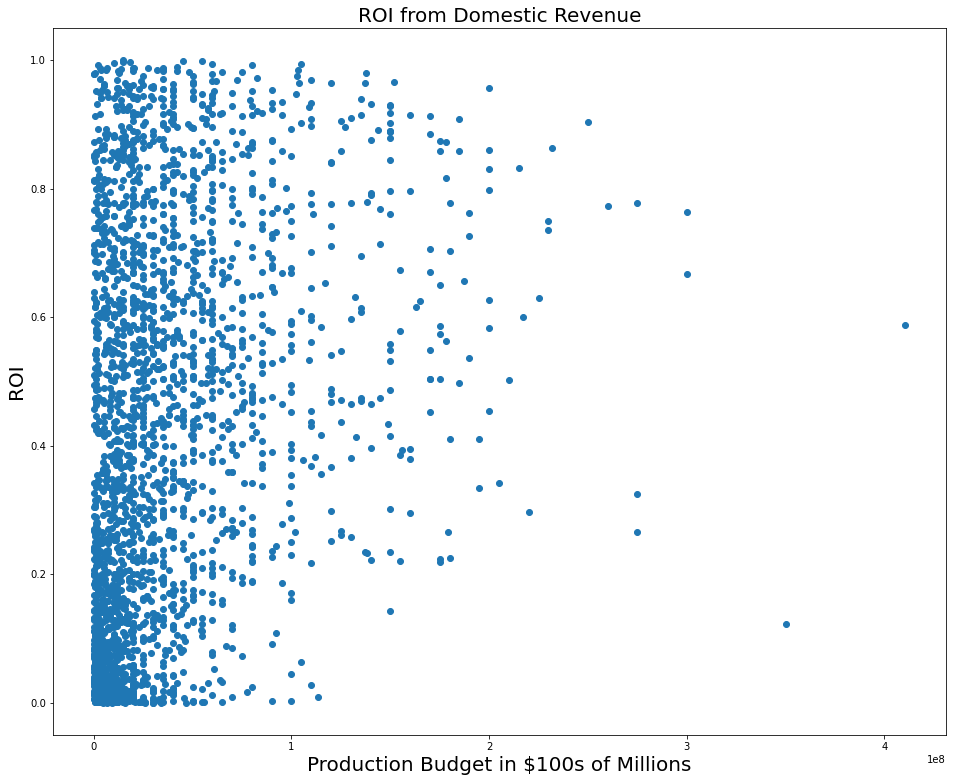

In [113]:
player_count_figure3, ax1 = plt.subplots(figsize=(16, 13))

plt.scatter(losers_df['production_budget'], losers_df['ROI for Domestic'])
plt.xlabel('Production Budget in $100s of Millions',fontsize = 20)
plt.ylabel('ROI',fontsize = 20)
plt.title('ROI from Domestic Revenue',fontsize = 20)
plt.show()


In [164]:
#Here I unzipped the the movie_ratings.csv and created a Pandas dataframe (df2)
movie_ratings = pd.read_csv('zippedData/movie_ratings_extracted.csv')
movie_ratings.head()

,Unnamed: 0,movie_id,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [163]:
#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False).tail(50)
movie_basics.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146094,146094,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy
146095,146095,tt9909086,Pheriaa Come Back,Pheriaa Come Back,2018,137.0,Drama
146096,146096,tt9909228,Ximei,Ximei,2019,98.0,Documentary
146097,146097,tt9909424,Razreshite tebya potselovat... Otets nevesty,Razreshite tebya potselovat... Otets nevesty,2014,90.0,Comedy
146098,146098,tt9909650,Hellbiro,Hellbiro,2018,95.0,Comedy


In [162]:
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='outer')
merged_df.head()


,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,146094.0,tt9908960,Pliusas,Pliusas,2018.0,90.0,Comedy,42169.0,4.2,13.0
1,146095.0,tt9909086,Pheriaa Come Back,Pheriaa Come Back,2018.0,137.0,Drama,NaN,NaN,NaN
2,146096.0,tt9909228,Ximei,Ximei,2019.0,98.0,Documentary,NaN,NaN,NaN
3,146097.0,tt9909424,Razreshite tebya potselovat... Otets nevesty,Razreshite tebya potselovat... Otets nevesty,2014.0,90.0,Comedy,NaN,NaN,NaN
4,146098.0,tt9909650,Hellbiro,Hellbiro,2018.0,95.0,Comedy,NaN,NaN,NaN


In [137]:
merged_sorted = merged_df.sort_values(by = 'movie_id')

In [161]:
merged_sorted.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",2223.0,6.1,13.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0


In [139]:
merged_sorted['movie_id'].duplicated().sum()

0

In [140]:
merged_sorted.shape

(146144, 10)

In [141]:
merged_sorted.isna().sum()

Unnamed: 0_x           0
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
Unnamed: 0_y       72288
averagerating      72288
numvotes           72288
dtype: int64

In [142]:
merged_sorted['averagerating'].dropna()

0         7.0
1         7.2
2         6.9
3         6.1
4         6.5
         ... 
146115    6.2
146122    8.7
146125    8.5
146129    6.6
146134    6.5
Name: averagerating, Length: 73856, dtype: float64

In [186]:
merged_sorted_cleaned = merged_sorted.dropna()
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",30166.0,8.1,263.0


In [187]:
genres_list = list(merged_sorted_cleaned['genres'].dropna())
genres_list[:5]

['Action,Crime,Drama',
 'Biography,Drama',
 'Drama',
 'Comedy,Drama,Fantasy',
 'Adventure,Animation,Comedy']

In [188]:
unique_genre_names = []

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 :
        unique_genre_names.append(i)
    else:
        None
unique_genre_names[:5]

['Drama', 'Drama', 'History', 'Documentary', 'Drama']

In [189]:
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : []})   
unique_genre_names_dic.keys()

dict_keys(['Drama', 'History', 'Documentary', 'Sci-Fi', 'Comedy', 'Thriller', 'Biography', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Romance', 'Mystery', 'Musical', 'Crime', 'Family', 'Animation', 'Western', 'Sport', 'Music', 'War', 'News', 'Game-Show', 'Reality-TV'])

In [190]:
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",30166.0,8.1,263.0


In [191]:
averagerating_list = list(merged_sorted_cleaned['averagerating'])
averagerating_list[0]

7.0

In [192]:
for i in range(0, len(genres_list)):
    string_name = genres_list[i]
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    
    for word in string_list:# think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:
            unique_genre_names_dic[word].append(averagerating_list[i])

In [197]:
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Talk-Show'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Reality-TV'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Game-Show'}


In [201]:
unique_genre_names_dic

{'Drama': [7.0,
  7.2,
  6.9,
  6.5,
  6.8,
  6.9,
  7.8,
  4.0,
  8.8,
  4.0,
  5.9,
  7.4,
  7.1,
  3.9,
  5.5,
  7.9,
  7.6,
  6.1,
  6.7,
  7.3,
  4.9,
  6.4,
  6.5,
  6.6,
  6.2,
  6.1,
  7.6,
  5.5,
  7.8,
  4.1,
  8.6,
  6.5,
  6.2,
  4.8,
  4.5,
  6.9,
  6.2,
  6.2,
  7.6,
  7.1,
  4.7,
  5.2,
  6.5,
  7.4,
  4.1,
  6.8,
  6.3,
  6.0,
  6.5,
  6.6,
  6.3,
  7.5,
  6.4,
  7.9,
  6.4,
  7.0,
  6.4,
  6.8,
  4.9,
  8.6,
  6.3,
  5.5,
  5.6,
  3.2,
  6.5,
  7.8,
  6.5,
  4.1,
  7.2,
  7.7,
  4.0,
  6.9,
  6.3,
  6.9,
  6.8,
  6.5,
  5.7,
  6.8,
  5.9,
  6.3,
  6.3,
  5.9,
  6.7,
  6.7,
  7.2,
  5.2,
  5.9,
  5.6,
  6.2,
  5.3,
  7.3,
  6.2,
  4.5,
  6.7,
  5.7,
  5.9,
  6.0,
  4.0,
  6.3,
  4.3,
  7.5,
  6.3,
  7.8,
  4.6,
  5.8,
  7.1,
  7.2,
  8.0,
  7.5,
  6.4,
  6.8,
  6.1,
  4.3,
  7.0,
  6.6,
  7.4,
  6.1,
  7.1,
  6.2,
  5.3,
  7.1,
  6.3,
  7.4,
  7.1,
  7.6,
  6.3,
  8.6,
  7.7,
  5.2,
  6.5,
  8.9,
  6.3,
  6.0,
  5.3,
  5.0,
  7.3,
  7.6,
  7.0,
  7.4,
  3.9,
  4.5,
  5.

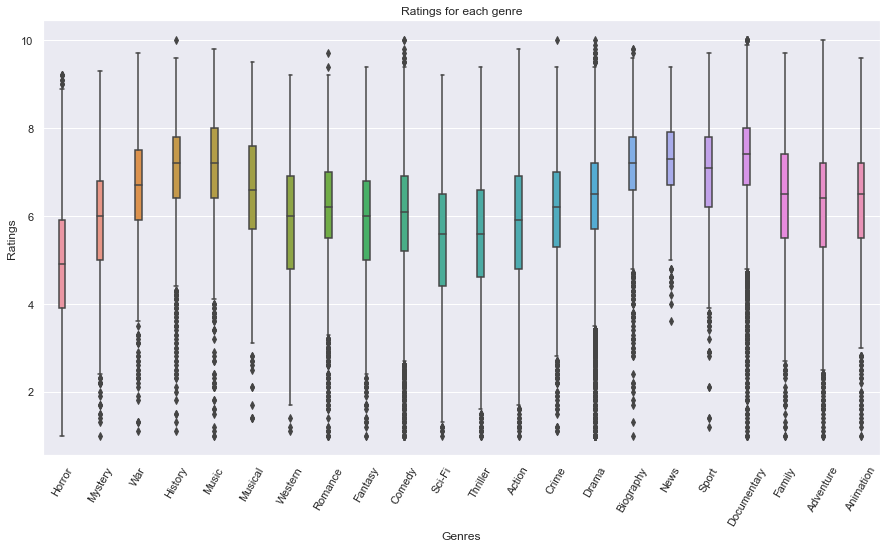

In [204]:
sorted_keys, sorted_vals = zip(*sorted(unique_genre_names_dic.items(), key=op.itemgetter(1)))

sns.set(context='notebook', style='whitegrid')


sns.set(rc = {'figure.figsize':(15,8)})

plot = sns.boxplot(data = sorted_vals ,  width = .18 , order =  ).set(
    xlabel='Genres', 
    ylabel='Ratings')



plt.title('Ratings for each genre')

plt.xticks(np.arange(0,22), list(sorted_keys), rotation=60) 

plt.show()